In [43]:
# Imports
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Bibliothèques importées")

✅ Bibliothèques importées


In [47]:
# Charger les fichiers de clics (premiers 50 fichiers pour la rapidité)
clicks_dir = Path("../data/clicks")
clicks_files = sorted(list(clicks_dir.glob("clicks_hour_*.csv")))[:50]

print(f"📂 {len(clicks_files)} fichiers trouvés")

# Charger et fusionner
dfs = []
for file in clicks_files:
    df = pd.read_csv(file)
    dfs.append(df)

interactions = pd.concat(dfs, ignore_index=True)
print(f"✅ {len(interactions):,} interactions chargées")
interactions.head()

📂 50 fichiers trouvés
✅ 448,380 interactions chargées


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [49]:
print("=" * 60)
print("📊 STATISTIQUES INTERACTIONS")
print("=" * 60)

print(f"\n👥 Utilisateurs uniques : {interactions['user_id'].nunique():,}")
print(f"📄 Articles consultés : {interactions['click_article_id'].nunique():,}")
print(f"🖱️ Total clics : {len(interactions):,}")
print(f"📊 Moyenne clics/utilisateur : {len(interactions) / interactions['user_id'].nunique():.1f}")
print(f"📊 Moyenne clics/article : {len(interactions) / interactions['click_article_id'].nunique():.1f}")

print("\nColonnes disponibles :")
print(interactions.columns.tolist())

📊 STATISTIQUES INTERACTIONS

👥 Utilisateurs uniques : 117,185
📄 Articles consultés : 9,386
🖱️ Total clics : 448,380
📊 Moyenne clics/utilisateur : 3.8
📊 Moyenne clics/article : 47.8

Colonnes disponibles :
['user_id', 'session_id', 'session_start', 'session_size', 'click_article_id', 'click_timestamp', 'click_environment', 'click_deviceGroup', 'click_os', 'click_country', 'click_region', 'click_referrer_type']


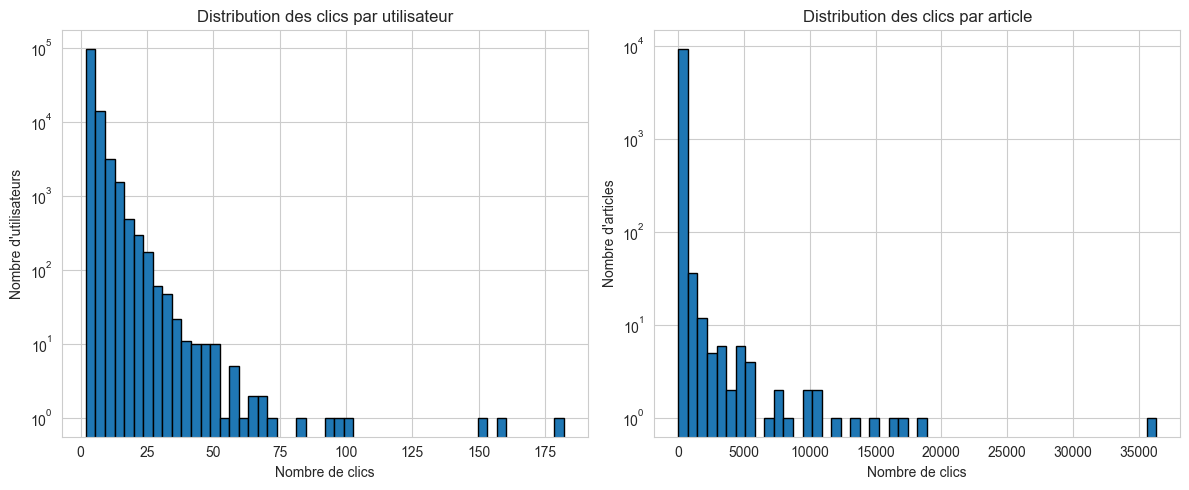

📊 Utilisateurs avec 1 seul clic : 0
📊 Utilisateurs avec 5+ clics : 28,123


In [51]:
# Distribution des clics par utilisateur
user_clicks = interactions.groupby('user_id').size()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(user_clicks, bins=50, edgecolor='black')
plt.xlabel('Nombre de clics')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution des clics par utilisateur')
plt.yscale('log')

plt.subplot(1, 2, 2)
article_clicks = interactions.groupby('click_article_id').size()
plt.hist(article_clicks, bins=50, edgecolor='black')
plt.xlabel('Nombre de clics')
plt.ylabel('Nombre d\'articles')
plt.title('Distribution des clics par article')
plt.yscale('log')

plt.tight_layout()
plt.show()

print(f"📊 Utilisateurs avec 1 seul clic : {(user_clicks == 1).sum():,}")
print(f"📊 Utilisateurs avec 5+ clics : {(user_clicks >= 5).sum():,}")

In [53]:
# Charger les métadonnées
articles = pd.read_csv("../data/articles_metadata.csv")

print(f"📄 {len(articles):,} articles dans les métadonnées")
print(f"\nColonnes : {articles.columns.tolist()}")
print(f"\nPremiers articles :")
articles.head()

📄 364,047 articles dans les métadonnées

Colonnes : ['article_id', 'category_id', 'created_at_ts', 'publisher_id', 'words_count']

Premiers articles :


,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


📊 STATISTIQUES ARTICLES

🏷️ Catégories uniques : 461
📝 Moyenne mots/article : 191
📝 Médiane mots/article : 186


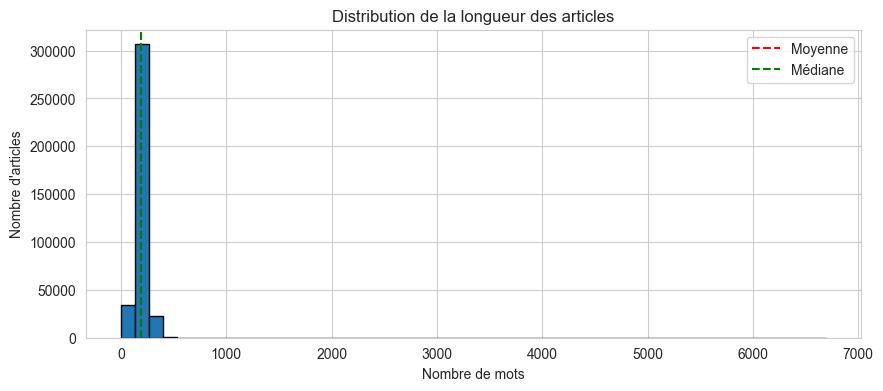

In [55]:
print("=" * 60)
print("📊 STATISTIQUES ARTICLES")
print("=" * 60)

print(f"\n🏷️ Catégories uniques : {articles['category_id'].nunique()}")
print(f"📝 Moyenne mots/article : {articles['words_count'].mean():.0f}")
print(f"📝 Médiane mots/article : {articles['words_count'].median():.0f}")

# Distribution longueur articles
plt.figure(figsize=(10, 4))
plt.hist(articles['words_count'], bins=50, edgecolor='black')
plt.xlabel('Nombre de mots')
plt.ylabel('Nombre d\'articles')
plt.title('Distribution de la longueur des articles')
plt.axvline(articles['words_count'].mean(), color='red', linestyle='--', label='Moyenne')
plt.axvline(articles['words_count'].median(), color='green', linestyle='--', label='Médiane')
plt.legend()
plt.show()

In [65]:
from pathlib import Path
import os

# Répertoire du notebook = Notebooks/
NOTEBOOK_DIR = Path.cwd()

# Si "data" n'est pas dans le répertoire courant
# on remonte d'un niveau jusqu'à le trouver
while not (Path("data").exists()):
    os.chdir("..")

print("📁 Répertoire de travail :", Path.cwd())
print("📁 data exists ?", Path("data").exists())


📁 Répertoire de travail : C:\Users\touad\Projects-Openclassrooms\Recommandation de contenu
📁 data exists ? True


In [85]:
# Charger les embeddings
with open("data/articles_embeddings.pickle", "rb") as f:
    embeddings = pickle.load(f)

# Infos sur les embeddings
first_emb = embeddings[0]  # Correction ici

print(f"📊 {len(embeddings):,} embeddings chargés")
print(f"📐 Dimension : {len(first_emb)}D")
print(f"📊 Type : {type(first_emb)}")


📊 364,047 embeddings chargés
📐 Dimension : 250D
📊 Type : <class 'numpy.ndarray'>


In [87]:
print("=" * 60)
print("🆕 ANALYSE COLD START")
print("=" * 60)

# Articles consultés vs articles totaux
articles_consultes = interactions['click_article_id'].nunique()
articles_totaux = len(articles)

print(f"\n📄 Articles consultés : {articles_consultes:,}")
print(f"📄 Articles totaux : {articles_totaux:,}")
print(f"⚠️ Articles jamais consultés : {articles_totaux - articles_consultes:,}")
print(f"📊 Taux de couverture : {articles_consultes / articles_totaux * 100:.1f}%")

# Utilisateurs avec peu d'historique
print(f"\n👥 Utilisateurs avec < 3 clics : {(user_clicks < 3).sum():,}")
print(f"👥 Utilisateurs avec < 5 clics : {(user_clicks < 5).sum():,}")
print(f"📊 Taux cold start users (< 5 clics) : {(user_clicks < 5).sum() / len(user_clicks) * 100:.1f}%")

🆕 ANALYSE COLD START

📄 Articles consultés : 9,386
📄 Articles totaux : 364,047
⚠️ Articles jamais consultés : 354,661
📊 Taux de couverture : 2.6%

👥 Utilisateurs avec < 3 clics : 57,306
👥 Utilisateurs avec < 5 clics : 89,062
📊 Taux cold start users (< 5 clics) : 76.0%


In [97]:
print("=" * 60)
print("✅ EXPLORATION TERMINÉE - INSIGHTS CLÉS")
print("=" * 60)

print("""
📊 DONNÉES DISPONIBLES :
- Interactions utilisateurs (clics) : OK
- Métadonnées articles : OK
- Embeddings pré-calculés (250D) : OK

🎯 PROBLÈMES IDENTIFIÉS :
- Cold start articles : ~87% jamais consultés
- Cold start utilisateurs : beaucoup ont < 5 clics
- Matrice user-item très creuse (sparse)

💡 STRATÉGIES DE RECOMMANDATION :
1. Content-Based : Similarité avec embeddings
2. Collaborative Filtering : rating implicite = nb de clics
3. Gestion du cold start : fallback popularité

🚀 PROCHAINE ÉTAPE :
- Passer au Notebook 02 : Content-Based Filtering
""")


✅ EXPLORATION TERMINÉE - INSIGHTS CLÉS

📊 DONNÉES DISPONIBLES :
- Interactions utilisateurs (clics) : OK
- Métadonnées articles : OK
- Embeddings pré-calculés (250D) : OK

🎯 PROBLÈMES IDENTIFIÉS :
- Cold start articles : ~87% jamais consultés
- Cold start utilisateurs : beaucoup ont < 5 clics
- Matrice user-item très creuse (sparse)

💡 STRATÉGIES DE RECOMMANDATION :
1. Content-Based : Similarité avec embeddings
2. Collaborative Filtering : rating implicite = nb de clics
3. Gestion du cold start : fallback popularité

🚀 PROCHAINE ÉTAPE :
- Passer au Notebook 02 : Content-Based Filtering

